In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import r2_score

In [4]:
with open("movement_libras.data") as file:
    data = pd.read_csv(file, header=None)
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
count,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,...,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000
mean,0.566613,0.555967,0.566377,0.555478,0.565640,0.554552,0.564867,0.552855,0.563094,0.548579,...,0.474814,0.487229,0.469181,0.488287,0.464905,0.490259,0.463760,0.492376,0.463767,8.000000
std,0.198916,0.187485,0.198306,0.187320,0.197863,0.187066,0.195968,0.186777,0.192667,0.185901,...,0.172685,0.209880,0.174674,0.213416,0.178629,0.218753,0.184384,0.225507,0.190831,4.326507
min,0.090909,0.148150,0.085106,0.148150,0.085106,0.148150,0.088975,0.145830,0.092843,0.145830,...,0.076389,0.059961,0.050926,0.029014,0.030093,0.011605,0.009259,0.005803,0.006944,1.000000
25%,0.444875,0.407410,0.440043,0.409720,0.438588,0.407410,0.437140,0.409720,0.435688,0.409720,...,0.354170,0.327370,0.346642,0.329785,0.342590,0.319630,0.332753,0.313350,0.328122,4.000000
50%,0.585105,0.581020,0.585105,0.582175,0.582205,0.582175,0.579305,0.564815,0.572535,0.556715,...,0.486110,0.481620,0.483800,0.474855,0.483800,0.479690,0.482640,0.487430,0.488430,8.000000
75%,0.720023,0.724540,0.721952,0.720488,0.720505,0.722220,0.720023,0.718170,0.714215,0.719910,...,0.597800,0.654737,0.594910,0.656675,0.592590,0.667310,0.608800,0.671663,0.615740,12.000000
max,0.932300,0.886570,0.930370,0.888890,0.932300,0.884260,0.932300,0.881940,0.932300,0.875000,...,0.831020,0.970990,0.819440,0.978720,0.824070,0.988390,0.872690,1.000000,0.884260,15.000000


In [5]:
diabetes_X, diabetes_y = data.iloc[:, 0:89], np.array(data.iloc[:, 90])

In [6]:
diabetes_X = np.array(diabetes_X)
# scaler = preprocessing.MinMaxScaler()
# scaled_df = scaler.fit_transform(diabetes_X)

In [7]:
# diabetes_X_train = scaled_df[:-100]
# diabetes_X_test = scaled_df[-100:]
# diabetes_y_train = diabetes_y[:-100]
# diabetes_y_test = diabetes_y[-100:]

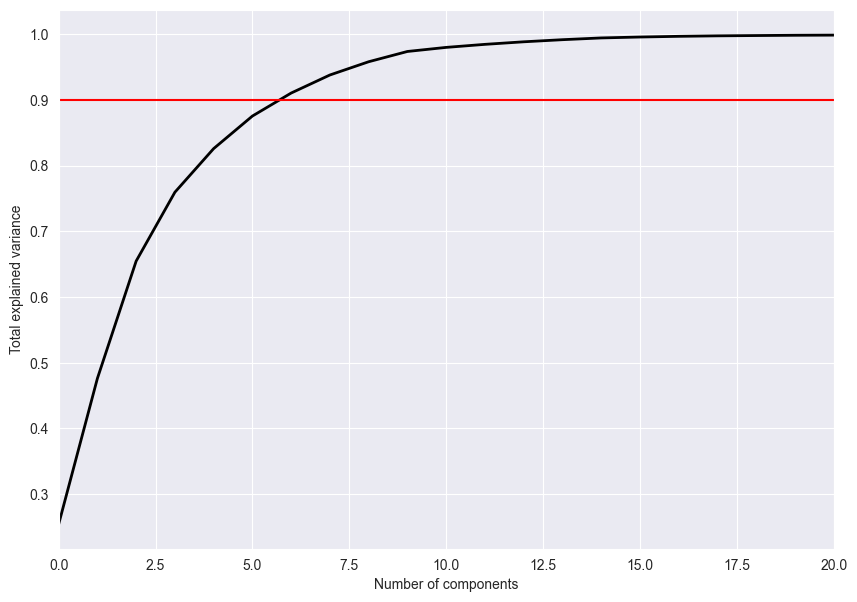

In [8]:
from sklearn import decomposition

pca = decomposition.PCA().fit(diabetes_X)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 20)
#plt.yticks(np.arange(0, 1.1, 0.1))
#plt.axvline(21, c='b')
plt.axhline(0.9, c='r')
plt.show();

C:\Users\User\AppData\Local\pypoetry\Cache\virtualenvs\ml-course-ru-hqgOjAuN-py3.10\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\User\AppData\Local\pypoetry\Cache\virtualenvs\ml-course-ru-hqgOjAuN-py3.10\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


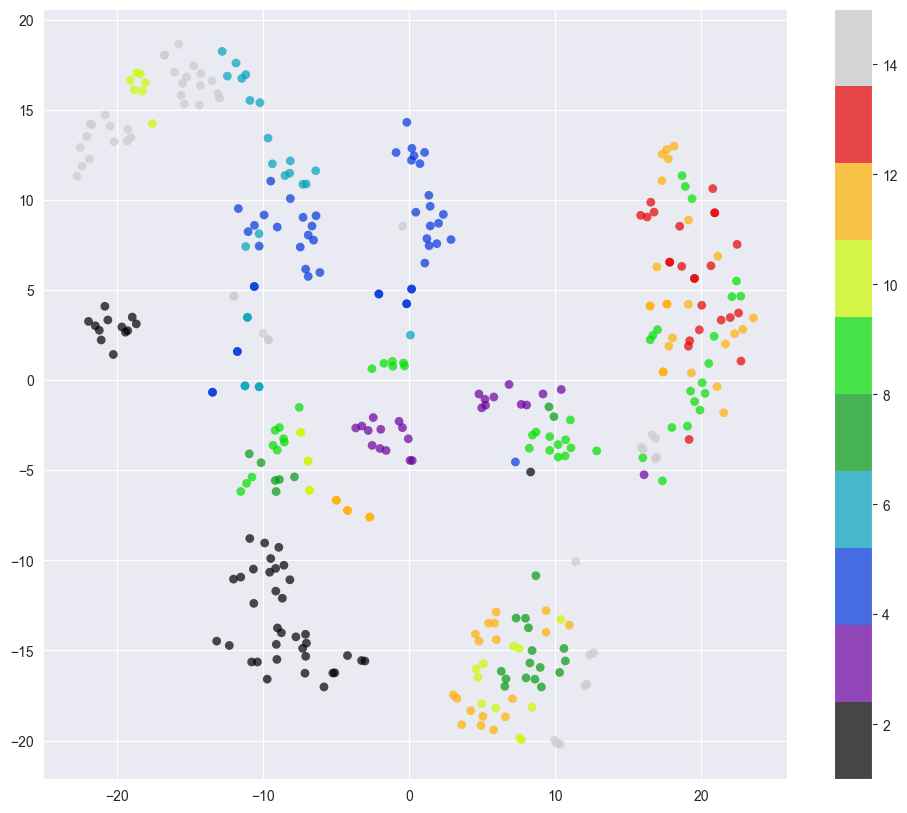

In [31]:
from sklearn.manifold import TSNE
pca = TSNE(random_state=17)
X_reduced = pca.fit_transform(diabetes_X)
plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=diabetes_y,
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()

[0.0]
[0.0, 0.041666666666666664]
[0.0, 0.041666666666666664, 0.03611111111111111]
[0.0, 0.041666666666666664, 0.03611111111111111, 0.06388888888888888]
[0.0, 0.041666666666666664, 0.03611111111111111, 0.06388888888888888, 0.05277777777777778]
[0.0, 0.041666666666666664, 0.03611111111111111, 0.06388888888888888, 0.05277777777777778, 0.05000000000000001]
[0.0, 0.041666666666666664, 0.03611111111111111, 0.06388888888888888, 0.05277777777777778, 0.05000000000000001, 0.03333333333333333]
[0.0, 0.041666666666666664, 0.03611111111111111, 0.06388888888888888, 0.05277777777777778, 0.05000000000000001, 0.03333333333333333, 0.10833333333333334]
[0.0, 0.041666666666666664, 0.03611111111111111, 0.06388888888888888, 0.05277777777777778, 0.05000000000000001, 0.03333333333333333, 0.10833333333333334, 0.07777777777777778]
[0.0, 0.041666666666666664, 0.03611111111111111, 0.06388888888888888, 0.05277777777777778, 0.05000000000000001, 0.03333333333333333, 0.10833333333333334, 0.07777777777777778, 0.06111

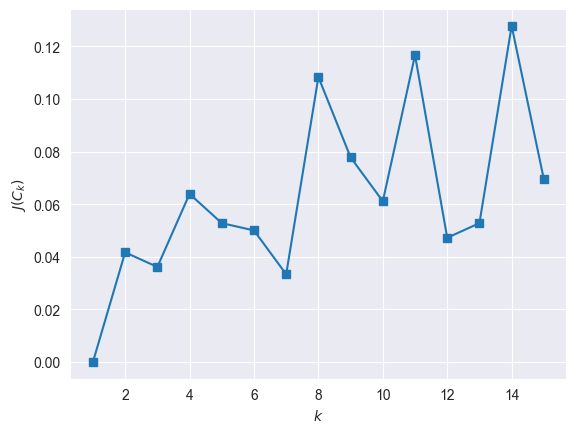

In [26]:
from sklearn.metrics import f1_score
from sklearn.cluster import KMeans

inertia = []
for k in range(1, 16):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(diabetes_X)
    y_predict = kmeans.predict(diabetes_X)
    inertia.append(f1_score(diabetes_y, y_predict ,average='micro'))
    print(inertia)


plt.plot(range(1, 16), inertia, marker='s')
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

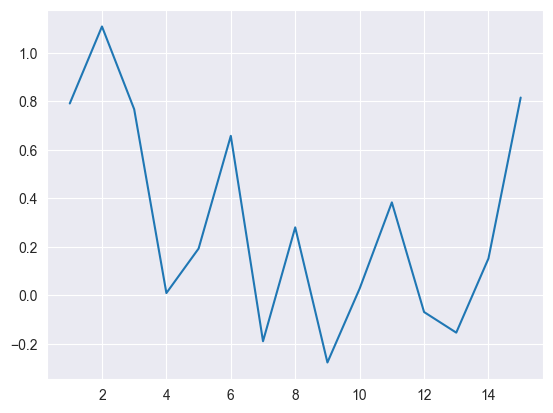

In [16]:
from scipy.interpolate import UnivariateSpline

y_spl = UnivariateSpline(range(1, 16),inertia,s=0,k=4)
y_spl_2d = y_spl.derivative(n=2)

plt.plot(range(1, 16),y_spl_2d(range(1, 16)))

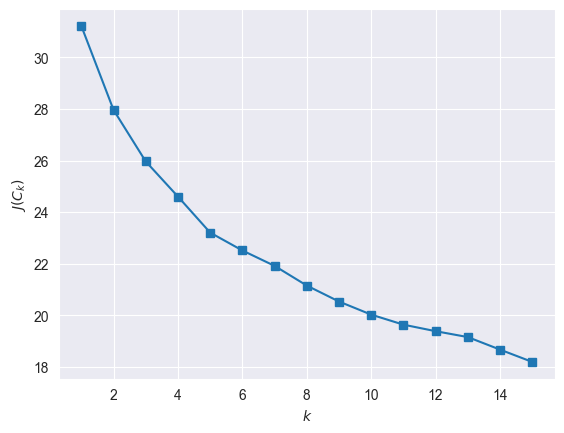

In [25]:
from sklearn.cluster import BisectingKMeans

bisecting = []
for k in range(1, 16):
    bisecting_kmeans = BisectingKMeans(n_clusters=k, random_state=1).fit(X_reduced)
    bisecting.append(np.sqrt(bisecting_kmeans.inertia_))

plt.plot(range(1, 16), bisecting, marker='s')
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

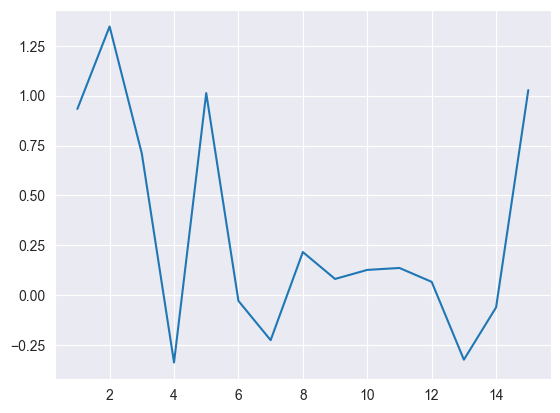

In [26]:
y_spl = UnivariateSpline(range(1, 16), bisecting ,s=0,k=4)
y_spl_2d = y_spl.derivative(n=2)

plt.plot(range(1, 16),y_spl_2d(range(1, 16)))